# Optimizing Lease Management for Oil Companies
*Notebook 5 of 5*

## Scenario Description:

In the vast landscape of oil-rich regions, companies often vie for ownership of prime drilling locations. This scenario revolves around efficiently dividing and managing land areas into smaller leaseholds for different oil companies.


## Benefits:

- **Fair Resource Allocation:** By dividing the land into smaller leaseholds and assigning ownership, the process ensures fair resource allocation among competing oil companies.

- **Efficient Lease Management:** With each leasehold tagged with a unique ID, lease management becomes streamlined, allowing for easy tracking and monitoring of activities within each parcel.

- **Visual Representation:** The resulting visualization of leaseholds and their respective owners provides a clear overview, aiding decision-makers in strategic planning and resource optimization.

## Use Case:

**Scenario:** In a prospective oil-rich region, multiple oil companies express interest in exploration and drilling activities.

**Solution:** By leveraging the provided workflow, the land area can be efficiently divided into leaseholds, ensuring equitable distribution among interested parties. This not only fosters healthy competition but also promotes sustainable resource management practices.

- **Aggregate Production by Lease**:
   - Sum the production values of new wells within each lease to get the total production for each lease owner.
- **Spatial Join**:
   - Perform a spatial join between the clustered wells and the lease boundaries to assign each well to its corresponding lease.
   **Calculate Production per Lease**:
   - Calculate the total production for each lease by summing the production values of all wells within that lease.
- **Spatial Autocorrelation Analysis**:
   - Compute spatial autocorrelation metrics such as Moran's I or Getis-Ord Gi* to determine the degree of spatial clustering or dispersion of production values within the bounding box.
- **Clustering Analysis**:
   - Utilize clustering algorithms like K-means, DBSCAN, or hierarchical clustering to identify spatial clusters of new wells based on their production values.
- **Identify Lease Owner with the Most Production**:
   - Determine which lease owner has the highest total production from the new wells.
- **Spatial Visualization**:
   - Visualize the spatial distribution of clusters and production values within the bounding box to gain insights and communicate findings effectively.


In [3]:
pip install geopandas pandas h3 matplotlib pysal splot shapely pyproj folium keplergl h3pandas

Note: you may need to restart the kernel to use updated packages.


This code generates synthetic data for oil wells within a specific geographic area and visualizes them on a map. Here's a breakdown:

1. **Imports**: Necessary libraries for geospatial data manipulation and visualization are imported.

2. **Production Range Definition**: Defines the range for the production rate of the oil wells.

3. **Bounding Box Definition**: Defines a geographic bounding box within which the oil wells will be generated.

4. **Center Calculation**: Calculates the center latitude and longitude of the bounding box.

5. **Generating Random Points**: Generates random latitude-longitude points within the specified bounding box.

6. **Creating GeoDataFrame**: Creates a GeoDataFrame to hold the points representing oil wells and their attributes.

7. **Plotting the GeoDataFrame**: Plots the generated oil wells on a map.

8. **Printing GeoDataFrame Information**: Prints the first few rows of the GeoDataFrame, showing the production rate and geometry of each oil well.


   production_rate                     geometry
0                1  POINT (-103.72615 30.52491)
1               13  POINT (-103.90404 30.54525)
2               27  POINT (-103.90183 30.51380)
3               56  POINT (-104.35789 30.57208)
4               43  POINT (-103.98918 30.06499)


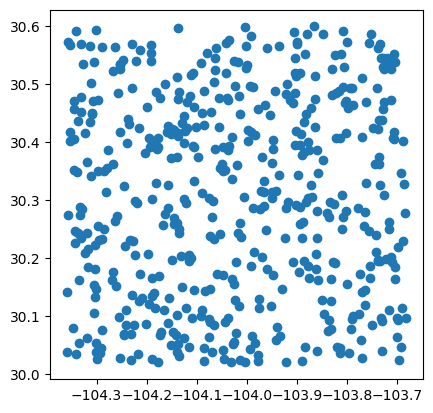

In [4]:
from shapely.geometry import Point
import numpy as np
import random
import folium
import geopandas as gpd
import h3

# Define the range for production
start = 0
stop = 100

# Define the bounding box for 
minx, miny = -103.6806, 30.0195
maxx, maxy = -104.3606, 30.5995

# Calculate the center latitude and longitude
center_lat = (miny + maxy) / 2
center_long = (minx + maxx) / 2

# Generate a list of random lat-long points within the bounding box
points = [Point(random.uniform(minx, maxx), random.uniform(miny, maxy)) for _ in np.arange(500)]

# Create a GeoDataFrame with the specified columns and attributes
wells_gdf = gpd.GeoDataFrame({'production_rate': [random.randint(start, stop) for _ in np.arange(500)],
                        'geometry': points}, crs='EPSG:4326')

# Plot the GeoDataFrame
wells_gdf.plot()

# Print the first few rows of the resulting GeoDataFrame
print(wells_gdf.head())

This code defines a function called `split_rectangle` that divides a given rectangle into smaller rectangles and assigns ownership to each smaller rectangle. Here's what it does and its relevance to the scenario:

1. **Function Definition**: Defines a function `split_rectangle` that takes the coordinates of the bounding box (`minx`, `miny`, `maxx`, `maxy`) and the number of smaller rectangles (`n`) to divide it into.

2. **Calculating Dimensions**: Calculates the width and height of the total rectangle and then determines the width and height of each smaller rectangle based on the number of divisions (`n`).

3. **Generating Rectangles**: Iterates over each division, calculates the coordinates of each smaller rectangle, and creates a Polygon geometry representing it.

4. **Creating GeoDataFrame**: Constructs a GeoDataFrame to hold the smaller rectangles, setting the CRS to EPSG:4326 (WGS 84).

5. **Assigning Ownership**: Generates random integers (1, 2, 3, or 4) to represent different owners for each smaller rectangle. These integers are then mapped to company names ('company a', 'company b', etc.).

6. **Adding Lease ID**: Adds a unique lease ID to each smaller rectangle.

7. **Calling the Function**: Calls the `split_rectangle` function with specified bounding box coordinates and the number of desired rectangles.

8. **Printing GeoDataFrame Information**: Prints the first few rows of the resulting GeoDataFrame, showing the ownership and lease ID of each smaller rectangle.

In the scenario, this function can be used to divide the land area into smaller leaseholds for different oil companies. It's relevant for managing and visualizing ownership and lease information for the oil wells within the specified geographic area.


In [5]:
import math
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon

def split_rectangle(minx, miny, maxx, maxy, n):
    # Calculate total width and height
    width_total = maxx - minx
    height_total = maxy - miny

    # Determine dimensions for each rectangle
    width_divided = width_total / math.ceil(math.sqrt(n))
    height_divided = height_total / math.ceil(math.sqrt(n))

    # Generate rectangles
    rectangles = []
    lease_ids = []
    for i in range(math.ceil(math.sqrt(n))):
        for j in range(math.ceil(math.sqrt(n))):
            rect_minx = minx + i * width_divided
            rect_miny = miny + j * height_divided
            rect_maxx = rect_minx + width_divided
            rect_maxy = rect_miny + height_divided
            rect_polygon = Polygon([(rect_minx, rect_miny), (rect_maxx, rect_miny),
                                    (rect_maxx, rect_maxy), (rect_minx, rect_maxy)])
            rectangles.append(rect_polygon)
            lease_ids.append(f"lease_{i}_{j}")  # Generating lease IDs

    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(geometry=rectangles, crs="EPSG:4326")

    # Generate random integers (1, 2, 3, or 4) for each row for 4 different owners
    gdf['owner'] = np.random.randint(1, 5, size=len(gdf))

    # Map the random integers to 'xyz', 'abc', 'def', or 'ghi' for each owner
    gdf['owner'] = gdf['owner'].map({1: 'company a', 2: 'copmany b', 3: 'company c', 4: 'copmany d'})

    # Add lease ID column
    gdf['lease_id'] = lease_ids

    return gdf


minx, miny = -103.6806, 30.0195
maxx, maxy = -104.3606, 30.5995
n_rectangles = 100  

lease_gdf = split_rectangle(minx, miny, maxx, maxy, n_rectangles)

# Print the first few rows of the resulting GeoDataFrame
print(lease_gdf.head())


                                            geometry      owner   lease_id
0  POLYGON ((-103.68060 30.01950, -103.74860 30.0...  company a  lease_0_0
1  POLYGON ((-103.68060 30.07750, -103.74860 30.0...  copmany d  lease_0_1
2  POLYGON ((-103.68060 30.13550, -103.74860 30.1...  copmany d  lease_0_2
3  POLYGON ((-103.68060 30.19350, -103.74860 30.1...  copmany d  lease_0_3
4  POLYGON ((-103.68060 30.25150, -103.74860 30.2...  company a  lease_0_4


In [6]:
import folium
from folium.plugins import FastMarkerCluster
from shapely.geometry import mapping

# Create a folium map centered at the mean of your GeoDataFrame's coordinates
m = folium.Map(location=[lease_gdf['geometry'].centroid.y.mean(), lease_gdf['geometry'].centroid.x.mean()], zoom_start=10)

# Convert the GeoDataFrame to GeoJSON
lease_gdf_json = lease_gdf.to_crs(epsg='4326').to_json()

# Add the GeoJSON data to the map
folium.GeoJson(lease_gdf_json).add_to(m)

# Add a FastMarkerCluster layer for improved performance with large datasets
FastMarkerCluster(data=lease_gdf['geometry'].apply(lambda geom: [geom.centroid.y, geom.centroid.x])).add_to(m)

# Display the map
m


C:\Users\hqxb\AppData\Local\Temp\ipykernel_19468\2461644374.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[lease_gdf['geometry'].centroid.y.mean(), lease_gdf['geometry'].centroid.x.mean()], zoom_start=10)


In [7]:
# Initialize the map
m = folium.Map(location=[center_lat, center_long], zoom_start=10)

# Add the rectangles with different owners
for _, row in lease_gdf.iterrows():
    folium.Rectangle(bounds=[[row.geometry.bounds[1], row.geometry.bounds[0]], [row.geometry.bounds[3], row.geometry.bounds[2]]],
                     color=row['owner'], fill_color=row['owner'], fill_opacity=0.4).add_to(m)

# Add points to the map
for _, row in wells_gdf.iterrows():
    folium.CircleMarker(location=[row.geometry.y, row.geometry.x], radius=3, color='blue', fill=True, fill_color='blue').add_to(m)

# Display the map
m

In [8]:

# Simple geoprocessing: Calculate total production value per lease
# Spatial join wells to leases
lease_well_join = gpd.sjoin(lease_gdf, wells_gdf, how='left', op='intersects')

# Calculate total production value per lease
lease_production = lease_well_join.groupby('lease_id')['production_rate'].sum().reset_index()

print("Total production value per lease:")
print(lease_production)



Total production value per lease:
     lease_id  production_rate
0   lease_0_0              275
1   lease_0_1              337
2   lease_0_2              146
3   lease_0_3              411
4   lease_0_4              107
..        ...              ...
95  lease_9_5              315
96  lease_9_6              296
97  lease_9_7              502
98  lease_9_8              179
99  lease_9_9              388

[100 rows x 2 columns]


c:\ProgramData\Miniconda3\envs\arc_env\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [9]:
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [10]:
map_1.add_data(data=wells_gdf, name="wells")


In [11]:
map_1.add_data(data=lease_gdf, name="lease")

This code snippet demonstrates a simple geoprocessing task using GeoPandas and Matplotlib to calculate and visualize the total production value per lease. Here's what each step does:

1. **Spatial join wells to leases**: It performs a spatial join operation between two GeoDataFrames (`lease_gdf` and `wells_gdf`). The operation joins the attributes of wells to the leases based on their spatial relationship. Specifically, it identifies which wells intersect with each lease. The resulting `lease_well_join` DataFrame contains combined information from both datasets.

2. **Calculate total production value per lease**: After the spatial join, the code calculates the total production value for each lease. It groups the data by the `lease_id` and sums up the production rates of all wells associated with each lease.

3. **Merge lease production data with original lease geometry**: This step merges the calculated total production values back into the original lease geometry dataset (`lease_gdf`). It adds a new column (`production_rate`) to the `lease_gdf` DataFrame, containing the total production value for each lease.

4. **Plotting**: Finally, the code creates a map visualization using Matplotlib. It plots the `lease_gdf_with_production` GeoDataFrame, where each lease is represented by a polygon. The polygons are colored according to the total production value (`production_rate`), creating a choropleth map. The `cmap='Blues'` parameter specifies the color map to use, and `legend=True` adds a color legend to the plot. The resulting map visualizes the spatial distribution of total production values across different leases.

Overall, this code demonstrates a common workflow in geospatial analysis: data manipulation, spatial analysis (spatial join), attribute aggregation, and visualization.


c:\ProgramData\Miniconda3\envs\arc_env\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


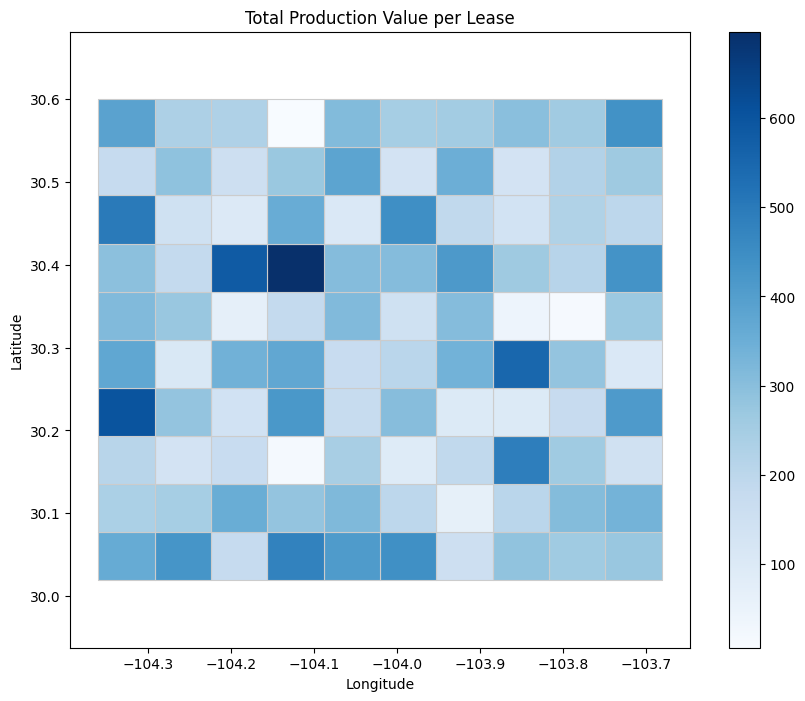

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Simple geoprocessing: Calculate total production value per lease
# Spatial join wells to leases
lease_well_join = gpd.sjoin(lease_gdf, wells_gdf, how='left', op='intersects')

# Calculate total production value per lease
lease_production = lease_well_join.groupby('lease_id')['production_rate'].sum().reset_index()

# Merge lease production data with original lease geometry
lease_gdf_with_production = lease_gdf.merge(lease_production, on='lease_id', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
lease_gdf_with_production.plot(column='production_rate', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Total Production Value per Lease')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.axis('equal')
plt.show()


This code snippet conducts geospatial analysis to identify the nearest well to the centroid of each lease. Although this specific scenario might not be common in practical applications, it demonstrates the versatility of geospatial analysis. A more realistic use case could involve utilizing an existing wellhead as a reference point for horizontal drilling.:

1. **Create a KDTree for wells**: A KDTree is a data structure for efficiently querying points in a multi-dimensional space. Here, it's created using the `cKDTree` function from the `scipy.spatial` module. It's based on the coordinates of the wells.

2. **Find nearest well to each lease**: For each lease, it finds the nearest well using the KDTree. The method returns the distances and indices of the nearest wells.

3. **Add nearest well ID to leases**: It adds the production rate of the nearest well to each lease.

This process is valuable for understanding the spatial relationship between leases and wells, which is important in industries like oil and gas for decision-making.


In [13]:
import numpy as np
from scipy.spatial import cKDTree

# Create a KDTree for wells
wells_tree = cKDTree(wells_gdf.geometry.apply(lambda geom: (geom.x, geom.y)).tolist())

# Find nearest well to each lease
distances, indices = wells_tree.query(lease_gdf.geometry.apply(lambda geom: geom.centroid.coords[0]).tolist(), k=1)

# Add nearest well ID to leases
nearest_wells = wells_gdf.loc[indices, ['production_rate', 'geometry']]
lease_gdf['nearest_well'] = nearest_wells['production_rate'].values

print("\nNearest well to each lease:")
print(lease_gdf[['lease_id', 'nearest_well']])





Nearest well to each lease:
     lease_id  nearest_well
0   lease_0_0            42
1   lease_0_1            27
2   lease_0_2            12
3   lease_0_3            68
4   lease_0_4            33
..        ...           ...
95  lease_9_5            99
96  lease_9_6            58
97  lease_9_7            66
98  lease_9_8            72
99  lease_9_9            27

[100 rows x 2 columns]


In [14]:
import folium

# Create a folium map centered at the mean of your GeoDataFrame's coordinates
m = folium.Map(location=[lease_gdf['geometry'].centroid.y.mean(), lease_gdf['geometry'].centroid.x.mean()], zoom_start=10)

# Add markers for leases
for idx, row in lease_gdf.iterrows():
    folium.CircleMarker(location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
                        radius=5,  # Adjust the radius as needed
                        color='blue',  # Lease marker color
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.5,  # Adjust transparency
                        popup=f"Lease ID: {row['lease_id']}").add_to(m)

# Add markers for nearest wells
for idx, row in nearest_wells.iterrows():
    folium.CircleMarker(location=[row['geometry'].y, row['geometry'].x],
                        radius=5,  # Adjust the radius as needed
                        color='green',  # Well marker color
                        fill=True,
                        fill_color='green',
                        fill_opacity=0.5,  # Adjust transparency
                        popup=f"Nearest Well\nProduction Rate: {row['production_rate']}").add_to(m)

# Display the map
m



C:\Users\hqxb\AppData\Local\Temp\ipykernel_19468\2945115179.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[lease_gdf['geometry'].centroid.y.mean(), lease_gdf['geometry'].centroid.x.mean()], zoom_start=10)


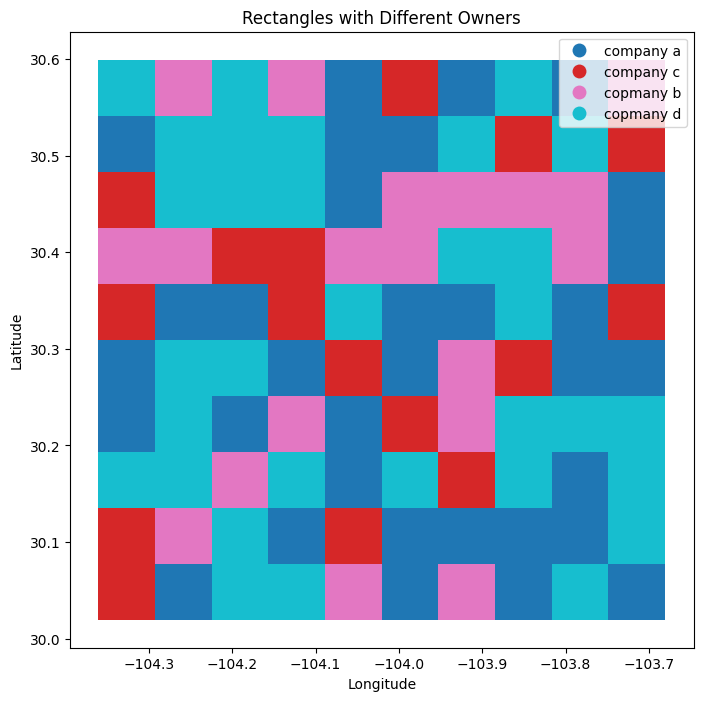

In [15]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
lease_gdf.plot(column='owner', legend=True, figsize=(10, 8))

# Add title and labels
plt.title('Rectangles with Different Owners')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


This code snippet showcases the utilization of both R-tree and Quadtree spatial indexing structures to execute spatial queries on geographical data. Even though the dataset used in this demonstration is modest in size, it's essential to consider scalability. As datasets grow larger, the efficiency of spatial indexing becomes increasingly crucial, especially when running numerous query iterations. Here's a detailed breakdown of what the code accomplishes:

- **Create R-tree Index for Wells**:
  - An R-tree index (`rtree_index`) is created to efficiently query wells based on their spatial extent (bounding boxes).
  - Each well's bounding box is inserted into the R-tree index.

- **Define Quadtree Class**:
  - A `QuadtreeNode` class is defined to represent nodes in the Quadtree structure.
  - The Quadtree is a hierarchical spatial index where each node represents a quadrant of space.
  - The `insert` method inserts a point into the Quadtree. If a node reaches its maximum capacity, it subdivides into four quadrants.
  - The `query` method retrieves all points within a given search boundary.

- **Create Quadtree Index for Wells**:
  - A Quadtree index (`quadtree_root`) is created to efficiently query wells based on their spatial relationships.
  - Each well's point is inserted into the Quadtree.

- **Perform Spatial Queries**:
  - The `find_wells_within_lease` function performs spatial queries to find wells within each lease polygon for both R-tree and Quadtree indexes.
  - For R-tree, it utilizes the `intersection` method to find candidate well bounding boxes intersecting with the lease boundary and then filters them based on exact containment within the lease polygon.
  - For Quadtree, it calls the `query` method of the root node to retrieve all wells within the lease boundary.

- **Measure Query Times**:
  - The code measures the execution time for each spatial query using both R-tree and Quadtree indexes.
  - Query times for both indexes are stored in lists (`rtree_query_times` and `quadtree_query_times`).

- **Compare Query Times**:
  - The average query times for R-tree and Quadtree indexes are computed.
  - The results are printed to compare the performance of both spatial indexing structures.


In [16]:
import geopandas as gpd
from shapely.geometry import Point
from rtree import index
import time

# Create R-tree index for wells
rtree_index = index.Index()
for idx, well in wells_gdf.iterrows():
    rtree_index.insert(idx, well.geometry.bounds)

# Define Quadtree class
class QuadtreeNode:
    def __init__(self, boundary):
        self.boundary = boundary
        self.points = []
        self.children = [None, None, None, None]

    def insert(self, point):
        if not self.boundary.contains(point):
            return False

        if len(self.points) < 4:  # Max capacity
            self.points.append(point)
            return True

        if all(child is not None for child in self.children):  # If all children exist
            quadrant = self.get_quadrant(point)
            return self.children[quadrant].insert(point)

        self.subdivide()
        return self.insert(point)

    def subdivide(self):
        minx, miny, maxx, maxy = self.boundary.bounds
        midx = (minx + maxx) / 2
        midy = (miny + maxy) / 2

        self.children[0] = QuadtreeNode(Point(midx, midy).buffer(0))
        self.children[1] = QuadtreeNode(Point(midx, miny).buffer(0))
        self.children[2] = QuadtreeNode(Point(minx, midy).buffer(0))
        self.children[3] = QuadtreeNode(Point(maxx, midy).buffer(0))

        for point in self.points:
            quadrant = self.get_quadrant(point)
            self.children[quadrant].insert(point)
        self.points = []  # Reset points

    def get_quadrant(self, point):
        midx = self.boundary.centroid.x
        midy = self.boundary.centroid.y
        if point.y < midy:
            return 0 if point.x < midx else 1
        else:
            return 2 if point.x < midx else 3

    def query(self, search_boundary):
        results = []
        if not self.boundary.intersects(search_boundary):
            return results

        for point in self.points:
            if search_boundary.contains(point):
                results.append(point)

        if all(child is not None for child in self.children):  # If all children exist
            for child in self.children:
                results.extend(child.query(search_boundary))
        return results

# Create Quadtree index for wells
minx, miny, maxx, maxy = wells_gdf.total_bounds
quadtree_root = QuadtreeNode(Point(minx, miny).buffer(0))
for idx, well in wells_gdf.iterrows():
    quadtree_root.insert(well.geometry)

# Perform spatial queries
def find_wells_within_lease(lease_geom, spatial_index):
    return [idx for idx in spatial_index.intersection(lease_geom.bounds) if wells_gdf.geometry[idx].within(lease_geom)]

rtree_query_times = []
quadtree_query_times = []

for idx, lease in lease_gdf.iterrows():
    start_time = time.time()
    wells_within_lease_rtree = find_wells_within_lease(lease.geometry, rtree_index)
    rtree_query_times.append(time.time() - start_time)

    start_time = time.time()
    wells_within_lease_quadtree = quadtree_root.query(lease.geometry)
    quadtree_query_times.append(time.time() - start_time)

# Compare query times
average_rtree_query_time = sum(rtree_query_times) / len(rtree_query_times)
average_quadtree_query_time = sum(quadtree_query_times) / len(quadtree_query_times)

print("Average R-tree query time:", average_rtree_query_time)
print("Average Quadtree query time:", average_quadtree_query_time)




Average R-tree query time: 0.00022005081176757813
Average Quadtree query time: 2.996683120727539e-05


In this code snippet, spatial autocorrelation analysis is conducted on well production rates using GeoPandas and PySAL libraries. Here's why this is important for the use case:

- **Understanding Spatial Relationships**: Analyzing spatial autocorrelation helps in understanding the degree to which well production rates are clustered or dispersed across the geographical area. This insight is crucial for identifying areas of high and low production and understanding the underlying spatial processes driving these patterns.

- **Informing Resource Allocation**: By identifying clusters of high or low well production rates, decision-makers can better allocate resources such as investment in infrastructure, exploration, or production optimization. For instance, areas with high production rates might require infrastructure upgrades to handle increased production, while areas with low production rates might benefit from targeted investment or intervention.

- **Optimizing Operations**: Spatial autocorrelation analysis can also inform operational decisions in the oil and gas industry. Understanding spatial patterns in production rates can help in optimizing drilling locations, production strategies, and resource allocation to maximize overall production efficiency and minimize costs.

- **Risk Assessment**: Identifying spatial clusters of well production rates can aid in risk assessment and mitigation. For example, areas with consistently low production rates may indicate geological challenges or resource depletion, prompting companies to adjust their exploration or development strategies accordingly.


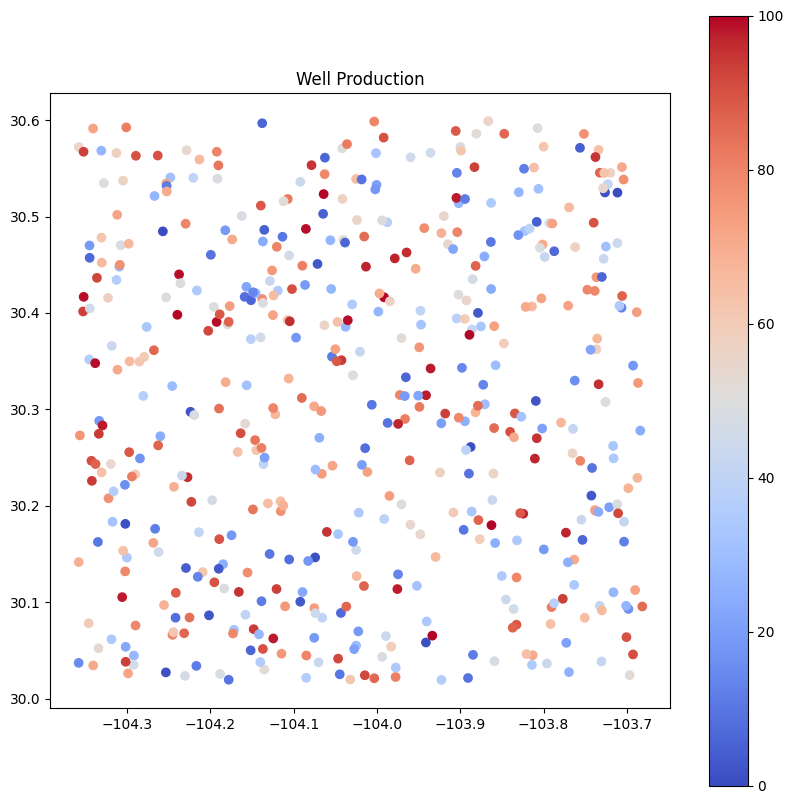

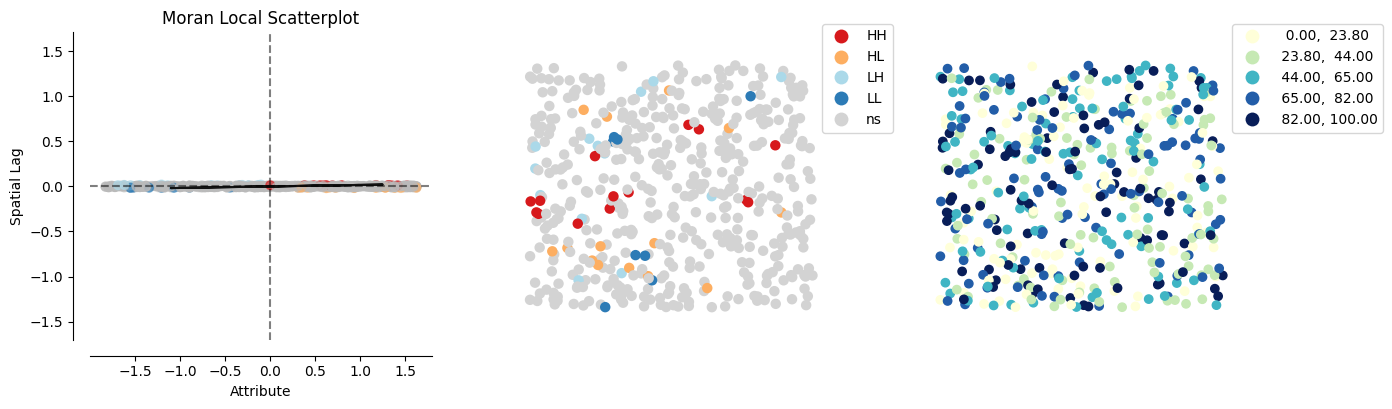

In [17]:
import geopandas as gpd
import libpysal.weights as weights
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation
import matplotlib.pyplot as plt


# Compute spatial weights
k = min(5, len(wells_gdf) - 1)
w = weights.KNN.from_dataframe(wells_gdf, k=k)

# Spatial Autocorrelation Analysis
moran = Moran(wells_gdf['production_rate'], w)

# Visualization
fig, ax = plt.subplots(figsize=(10, 10))
wells_gdf.plot(column='production_rate', cmap='coolwarm', legend=True, ax=ax)
plt.title('Well Production')
plt.show()

# Visualize Local Moran's I
local_moran = Moran_Local(wells_gdf['production_rate'], w)
plot_local_autocorrelation(local_moran, wells_gdf, 'production_rate')
plt.show()


These results are from a spatial autocorrelation analysis, specifically using Moran's I statistic and Local Moran's I. Here's how you can interpret them:

**Spatial Weights:** A K-nearest neighbors (KNN) spatial weights matrix is created. This matrix defines the spatial relationships between observations. In this case, each well's production rate is compared to that of its nearest neighbors.

**Moran's I:** Moran's I is a global measure of spatial autocorrelation. It ranges from -1 to 1, where:

Values close to -1 indicate negative spatial autocorrelation (similar values are far from each other).
Values close to 1 indicate positive spatial autocorrelation (similar values are close to each other).
Values around 0 indicate no spatial autocorrelation (values are randomly distributed).
The Moran's I statistic measures the degree of clustering or dispersion of the variable of interest across the study area. If Moran's I is statistically significant (typically assessed through hypothesis testing), it indicates the presence of spatial autocorrelation.

**Visualization of Well Production:** The first plot displays the spatial distribution of well production rates using a color gradient (colormap). It helps visualize the general pattern of well production across the study area.

**Local Moran's I:** Local Moran's I calculates spatial autocorrelation for each observation and its neighbors individually. It identifies spatial clusters of high values surrounded by high values (HH), low values surrounded by low values (LL), high values surrounded by low values (HL), and low values surrounded by high values (LH). This provides insights into the specific locations where spatial autocorrelation is occurring.

**Visualization of Local Moran's I:** The second plot (generated by plot_local_autocorrelation) visualizes the local spatial autocorrelation patterns. It highlights areas with significant spatial clusters based on the local Moran's I values.

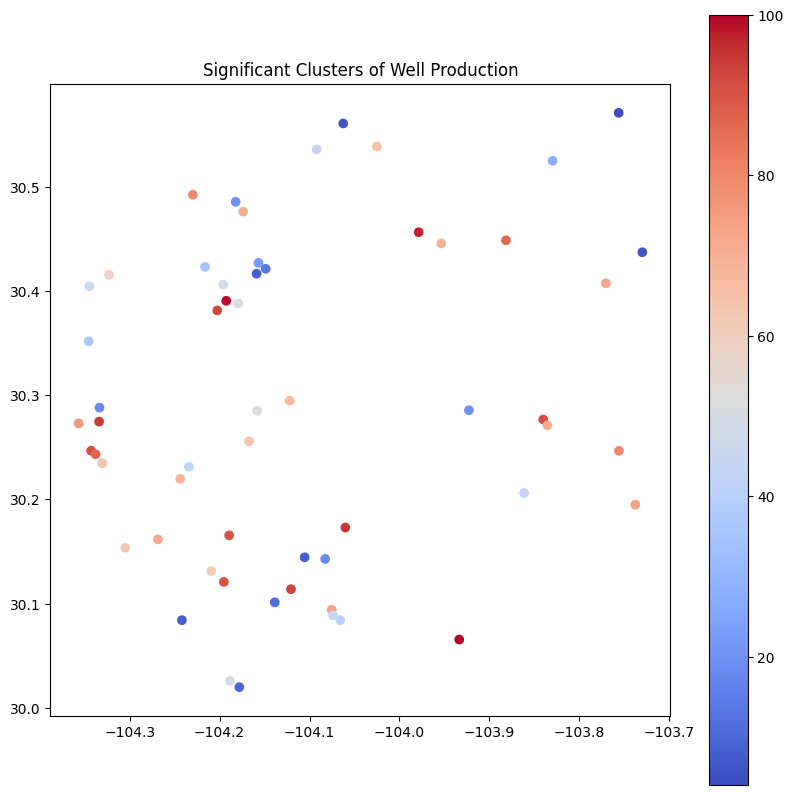

In [18]:
import geopandas as gpd
import libpysal.weights as weights
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation
import matplotlib.pyplot as plt


# Compute spatial weights
k = min(5, len(wells_gdf) - 1)
w = weights.KNN.from_dataframe(wells_gdf, k=k)

# Spatial Autocorrelation Analysis
moran = Moran(wells_gdf['production_rate'], w)

# Visualize Local Moran's I
local_moran = Moran_Local(wells_gdf['production_rate'], w)

# Filter significant clusters
significant_clusters = wells_gdf[local_moran.p_sim <= 0.05]

# Visualization
fig, ax = plt.subplots(figsize=(10, 10))
significant_clusters.plot(column='production_rate', cmap='coolwarm', legend=True, ax=ax)
plt.title('Significant Clusters of Well Production')
plt.show()



This code is crucial for analyzing and visualizing spatial patterns in oil or gas well production rates within lease areas. Here's a breakdown of its importance:

1. **Spatial Autocorrelation Analysis**: The code utilizes spatial autocorrelation analysis to identify clusters of high-production wells. This is essential for understanding if the production rates of wells are spatially dependent or clustered.

2. **Identification of Significant Clusters**: By filtering wells based on the significance of their clustering using Local Moran's I, the code identifies significant clusters of high-production wells. This helps in pinpointing areas with noteworthy production rates, which could be indicative of favorable geological conditions or efficient extraction methods.

3. **Spatial Join and Aggregation**: The code performs a spatial join between high-production wells and lease polygons. This allows for aggregating well production data at the lease level, enabling a more comprehensive analysis of production patterns across lease areas rather than individual wells.

4. **Visualization of Results**: The final visualization depicts lease polygons with significant clusters of high-production wells highlighted. Additionally, polygons with three or more high-production wells are outlined in red, providing a clear indication of areas with concentrated high production. This visual representation aids in interpreting spatial patterns and making informed decisions related to resource management and exploration strategies.

Overall, this code facilitates the spatial analysis and visualization of high-production well clusters within lease areas, aiding stakeholders in the oil and gas industry to optimize extraction operations and maximize resource utilization.


c:\ProgramData\Miniconda3\envs\arc_env\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


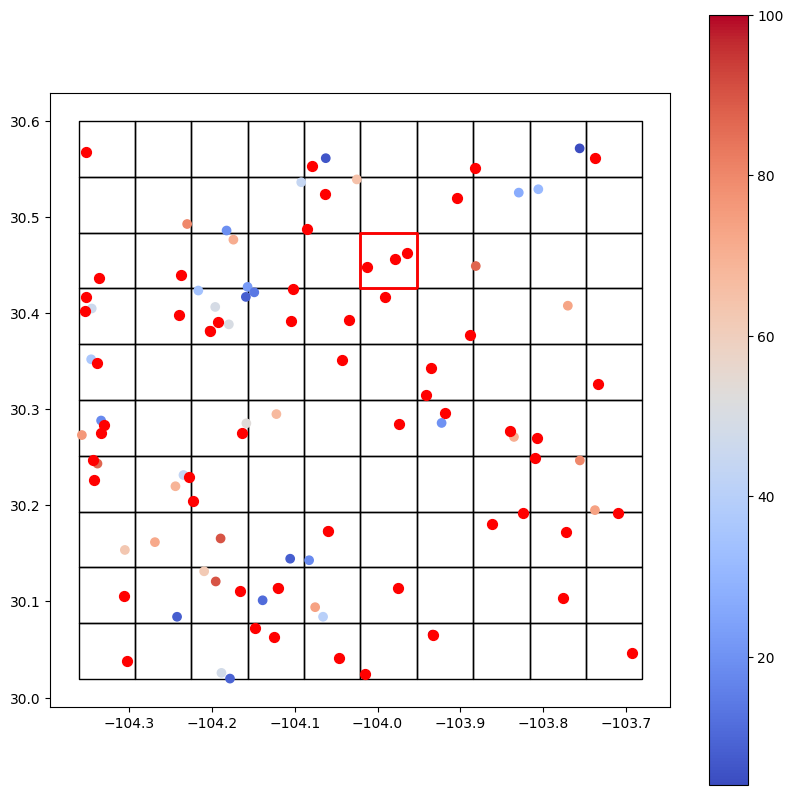

In [19]:
import geopandas as gpd
import libpysal.weights as weights
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation
import matplotlib.pyplot as plt
from geopandas.tools import sjoin

# Assuming wells_gdf and lease_gdf are already loaded

# Compute spatial weights
k = min(5, len(wells_gdf) - 1)
w = weights.KNN.from_dataframe(wells_gdf, k=k)

# Spatial Autocorrelation Analysis
moran = Moran(wells_gdf['production_rate'], w)

# Visualize Local Moran's I
local_moran = Moran_Local(wells_gdf['production_rate'], w)

# Filter significant clusters
significant_clusters = wells_gdf[local_moran.p_sim <= 0.05]

# Filter wells with production rates over 50
high_production_wells = wells_gdf[wells_gdf['production_rate'] > 90]

# Spatial join high_production_wells with lease_gdf
high_production_wells_with_lease = sjoin(high_production_wells, lease_gdf, how="inner", op="intersects")

# Count high-production wells per lease
lease_well_counts = high_production_wells_with_lease.groupby('lease_id').size().reset_index(name='well_count')

# Filter lease polygons with three or more high-production wells
polygons_with_three_or_more_wells = lease_well_counts[lease_well_counts['well_count'] >= 3]

# Visualization
fig, ax = plt.subplots(figsize=(10, 10))

# Plot lease polygons
lease_gdf.plot(ax=ax, facecolor='none', edgecolor='black')

# Plot significant clusters of high-production wells
significant_clusters.plot(column='production_rate', cmap='coolwarm', legend=True, ax=ax)

# Plot high-production wells with lease polygons highlighted
high_production_wells_with_lease.plot(ax=ax, color='red', markersize=50)

# Plot polygons with three or more high-production wells with red outline
for idx, row in polygons_with_three_or_more_wells.iterrows():
    lease_id = row['lease_id']
    lease_polygon = lease_gdf[lease_gdf['lease_id'] == lease_id]
    lease_polygon.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

plt.show()



In [20]:
high_production_wells_with_lease.head()

,production_rate,geometry,index_right,owner,lease_id,nearest_well
5,97,POINT (-103.77308 30.17226),12,company a,lease_1_2,97
40,91,POINT (-103.84007 30.27675),24,company c,lease_2_4,85
50,91,POINT (-103.69249 30.04601),0,company a,lease_0_0,42
60,96,POINT (-104.22749 30.22973),83,copmany d,lease_8_3,69
79,100,POINT (-103.88893 30.37736),36,copmany d,lease_3_6,38


In [21]:
# Load an empty map
from keplergl import KeplerGl
map_2 = KeplerGl()
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [22]:
map_2.add_data(data=high_production_wells, name="wells_high_production")

In [23]:
map_2.add_data(data=lease_gdf, name="lease")